# Logistic Regression

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/drive/MyDrive/images_analyzed_productivity1.csv')
df.head()

,User,Time,Coffee,Age,Images_Analyzed,Productivity
0,1,8,0,23,20,Good
1,1,13,0,23,14,Bad
2,1,17,0,23,18,Good
3,1,22,0,23,15,Bad
4,1,8,2,23,22,Good


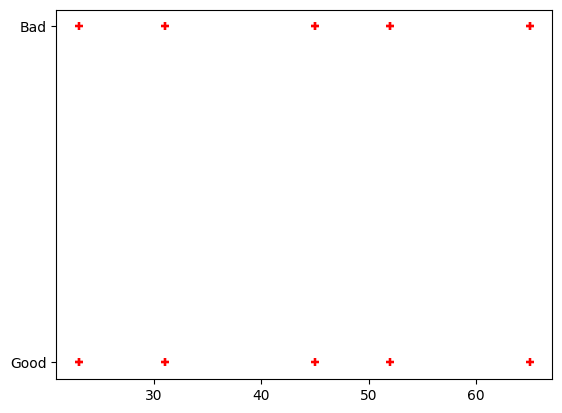

In [17]:
plt.scatter(df.Age, df.Productivity, marker='+', c='red')

In [18]:
sized = df['Productivity'].value_counts(sort=1)

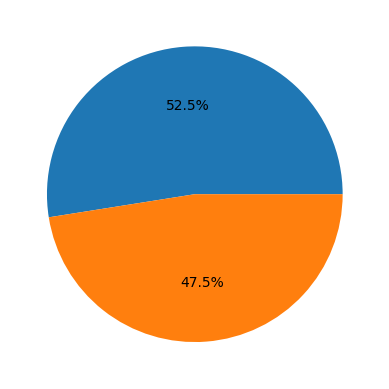

In [19]:
plt.pie(sized, autopct='%1.1f%%')
plt.show()

## Droping Irrelevant Data

In [20]:
df.drop(['Images_Analyzed'], axis=1, inplace=True)
df.drop(['User'], axis=1, inplace=True)
print(df.head())

   Time  Coffee  Age Productivity
0     8       0   23         Good
1    13       0   23          Bad
2    17       0   23         Good
3    22       0   23          Bad
4     8       2   23         Good


In [21]:
df = df.dropna()
print(df.head())

   Time  Coffee  Age Productivity
0     8       0   23         Good
1    13       0   23          Bad
2    17       0   23         Good
3    22       0   23          Bad
4     8       2   23         Good


## From Non-Numeric Data to Numeric Data

In [27]:
df.loc[df['Productivity'] == 'Good', 'Productivity'] = 1
df.loc[df['Productivity'] == 'Bad', 'Productivity'] = 2
print(df.head())

   User  Time  Coffee  Age  Images_Analyzed Productivity
0     1     8       0   23               20            1
1     1    13       0   23               14            2
2     1    17       0   23               18            1
3     1    22       0   23               15            2
4     1     8       2   23               22            1


## Prepare the data
**Independent/Dependent variables**

In [43]:
Y = df['Productivity'].values
X = df.drop(['Productivity'], axis=1)

In [44]:
print(X.head())
print(Y)

   User  Time  Coffee  Age  Images_Analyzed
0     1     8       0   23               20
1     1    13       0   23               14
2     1    17       0   23               18
3     1    22       0   23               15
4     1     8       2   23               22
[1 2 1 2 1 2 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1
 2 1 2 1 2 1 1 1 2 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 2 2]


## Training and Testing Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4 ,random_state=42)

In [55]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
print(X_test.head())

    User  Time  Coffee  Age  Images_Analyzed
30     2    16       6   65               15
0      1     8       0   23               20
22     2    16       2   65               19
31     2    20       6   65               13
18     2    16       0   65               17


## Model


In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [59]:
preds = model.predict(X_test)
preds

array([2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 2])

## Accuracy

In [61]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(Y_test, preds))

Accuracy 0.90625


In [64]:
# Model Weights
#print(model.coef_)
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values())

Images_Analyzed   -1.784957
User              -0.511598
Time               0.073286
Age                0.073570
Coffee             0.197058
dtype: float64
